In [29]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

pd.options.display.max_columns=150

In [30]:
df = pd.read_csv('savant_data.csv')
df.head()

,pitch_type,game_date,release_speed,release_pos_x,release_pos_z,player_name,batter,pitcher,events,description,spin_dir,spin_rate_deprecated,break_angle_deprecated,break_length_deprecated,zone,des,game_type,stand,p_throws,home_team,away_team,type,hit_location,bb_type,balls,strikes,game_year,pfx_x,pfx_z,plate_x,plate_z,on_3b,on_2b,on_1b,outs_when_up,inning,inning_topbot,hc_x,hc_y,tfs_deprecated,tfs_zulu_deprecated,fielder_2,umpire,sv_id,vx0,vy0,vz0,ax,ay,az,sz_top,sz_bot,hit_distance_sc,launch_speed,launch_angle,effective_speed,release_spin_rate,release_extension,game_pk,pitcher.1,fielder_2.1,fielder_3,fielder_4,fielder_5,fielder_6,fielder_7,fielder_8,fielder_9,release_pos_y,estimated_ba_using_speedangle,estimated_woba_using_speedangle,woba_value,woba_denom,babip_value,iso_value,launch_speed_angle,at_bat_number,pitch_number,pitch_name,home_score,away_score,bat_score,fld_score,post_away_score,post_home_score,post_bat_score,post_fld_score,if_fielding_alignment,of_fielding_alignment
0,SL,2019-08-22,87.5,-1.1514,6.1110,Khris Davis,501981,570666,field_out,hit_into_play,NaN,NaN,NaN,NaN,9.0,"Khris Davis grounds out, pitcher Luis Cessa to...",R,R,R,OAK,NYY,X,1.0,ground_ball,2,2,2019,0.0362,0.1156,0.7145,1.5827,NaN,592192.0,NaN,2,8,Bot,127.81,182.12,NaN,NaN,596142.0,NaN,190823_041901,4.3610,-127.4165,-5.0608,-0.3440,21.3541,-30.3032,3.5047,1.6500,10.0,73.9,-8.0,86.859,2602.0,5.434,566150,570666,596142.0,645801.0,650402.0,518934.0,544369.0,643565.0,458731.0,592450.0,55.0653,0.066,0.071,0.0,1.0,0.0,0.0,2.0,65,5,Slider,5,2,5,2,2,5,5,2,Infield shift,Standard
1,FF,2019-08-22,96.5,-1.2227,6.1231,Khris Davis,501981,570666,NaN,foul,NaN,NaN,NaN,NaN,6.0,NaN,R,R,R,OAK,NYY,S,NaN,NaN,2,1,2019,-0.7892,1.4612,0.7375,2.8155,NaN,592192.0,NaN,2,8,Bot,NaN,NaN,NaN,NaN,596142.0,NaN,190823_041835,6.8585,-140.2659,-6.4093,-11.6273,28.8123,-12.1681,3.4070,1.6500,213.0,82.1,21.0,95.563,2383.0,5.605,566150,570666,596142.0,645801.0,650402.0,518934.0,544369.0,643565.0,458731.0,592450.0,54.8949,NaN,NaN,NaN,NaN,NaN,NaN,NaN,65,4,4-Seam Fastball,5,2,5,2,2,5,5,2,Infield shift,Standard
2,SL,2019-08-22,87.7,-1.2020,6.1063,Khris Davis,501981,570666,NaN,blocked_ball,NaN,NaN,NaN,NaN,14.0,NaN,R,R,R,OAK,NYY,B,NaN,NaN,1,1,2019,-0.0237,0.0548,1.6910,0.3378,NaN,592192.0,NaN,2,8,Bot,NaN,NaN,NaN,NaN,596142.0,NaN,190823_041808,6.9922,-127.3635,-7.9035,-1.5700,23.9272,-30.3083,3.4951,1.7497,NaN,NaN,NaN,87.404,2659.0,6.022,566150,570666,596142.0,645801.0,650402.0,518934.0,544369.0,643565.0,458731.0,592450.0,54.4776,NaN,NaN,NaN,NaN,NaN,NaN,NaN,65,3,Slider,5,2,5,2,2,5,5,2,Infield shift,Standard
3,FF,2019-08-22,96.5,-0.9789,6.2158,Khris Davis,501981,570666,NaN,ball,NaN,NaN,NaN,NaN,14.0,NaN,R,R,R,OAK,NYY,B,NaN,NaN,0,1,2019,-0.6949,1.3997,1.4174,1.9864,NaN,592192.0,NaN,2,8,Bot,NaN,NaN,NaN,NaN,596142.0,NaN,190823_041750,7.7180,-140.0283,-8.5805,-10.4354,28.3053,-12.8048,3.5668,1.7611,NaN,NaN,NaN,94.894,2372.0,5.279,566150,570666,596142.0,645801.0,650402.0,518934.0,544369.0,643565.0,458731.0,592450.0,55.2209,NaN,NaN,NaN,NaN,NaN,NaN,NaN,65,2,4-Seam Fastball,5,2,5,2,2,5,5,2,Infield shift,Standard
4,SL,2019-08-22,87.4,-1.2084,6.0456,Khris Davis,501981,570666,NaN,swinging_strike,NaN,NaN,NaN,NaN,14.0,NaN,R,R,R,OAK,NYY,S,NaN,NaN,0,0,2019,0.0386,0.0462,0.9252,1.4305,NaN,592192.0,NaN,2,8,Bot,NaN,NaN,NaN,NaN,596142.0,NaN,190823_041732,5.0054,-127.1759,-5.0997,-0.4615,22.2270,-30.9997,3.5816,1.7394,NaN,NaN,NaN,86.970,2537.0,5.690,566150,570666,596142.0,645801.0,650402.0,518934.0,544369.0,643565.0,458731.0,592450.0,54.8094,NaN,NaN,NaN,NaN,NaN,NaN,NaN,65,1,Slider,5,2,5,2,2,5,5,2,Infield shift,Standard


In [31]:
df.dropna(subset=['launch_speed'],inplace=True)

x = df['plate_x']
y = df['plate_z']
z = df['launch_speed']

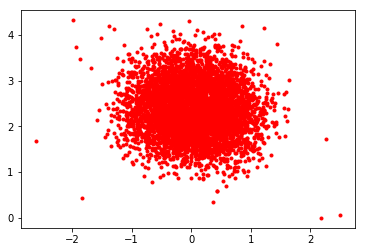

In [32]:
#Simplest scatterplot
plt.plot(x,y,'r .')

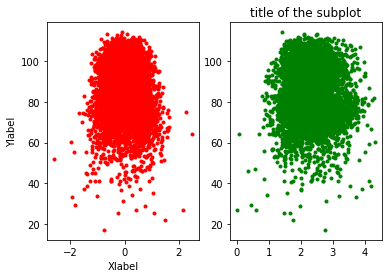

In [33]:
#figure and subplots(n_rows,n_cols,plot_nb)
fig = plt.figure()

#making plot 1
plt.subplot(1,2,1) 
plt.plot(x,z,'r .')
plt.xlabel('Xlabel')
plt.ylabel('Ylabel')

#making plot 2
plt.subplot(1,2,2)
plt.plot(y,z,'g .')

#plot title and axes
plt.title('title of the subplot')

plt.show()

#Saving a figure
fig.savefig('test.png')


/Users/samuelholden/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


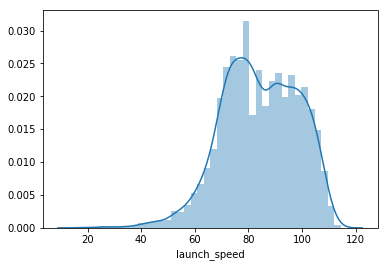

In [34]:
#Let's look at seaborn for a minute
##Histogram
sns.distplot(z)

([<matplotlib.axis.YTick at 0x1193ec828>,
 <a list of 6 Text yticklabel objects>)

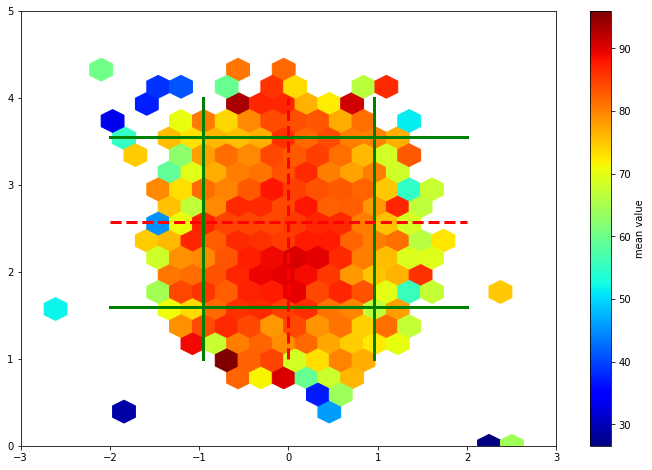

In [39]:
##heatmap

from matplotlib import cm as CM
from matplotlib import mlab as ML

X, Y = np.meshgrid(x, y)

gridsize=20
plt.figure(figsize=(12,8))
plt.subplot(111)

plt.hexbin(x, y, C=z, gridsize=gridsize, cmap=CM.jet, bins=None)
plt.axis([x.min(), x.max(), y.min(), y.max()])

cb = plt.colorbar()
cb.set_label('mean value')

plt.plot([0.958, 0.958], [1, 4], color='green', linestyle='-', linewidth=3) #in/off plate
plt.plot([-0.958, -0.958], [1, 4], color='green', linestyle='-', linewidth=3)

plt.plot([-2, 2], [1.60, 1.60], color='green', linestyle='-', linewidth=3) #upper/lower strikezones
plt.plot([-2, 2], [3.55, 3.55], color='green', linestyle='-', linewidth=3)

plt.plot([0, 0], [1, 4], color='red', linestyle='--', linewidth=3) #red midline
plt.plot([-2, 2], [2.575, 2.575], color='red', linestyle='--', linewidth=3) #red midline

plt.xticks(np.arange(-3, 4, step=1))
plt.yticks(np.arange(0, 6, step=1))
